<a href="https://colab.research.google.com/github/jamesbengi/Handwriten-digit-recognizer/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#load the dataset
(X_train, y_train),(X_test, y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
#convert to one hot vector
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
#reshape the input features
X_train=np.reshape(X_train,[-1,784])
X_train=X_train.astype('float32') / 255
X_test=np.reshape(X_test,[-1,784])
X_test=X_test.astype('float32') / 255

In [6]:
X_test.shape

(10000, 784)

In [7]:
#model a
model_a= keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model_a.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history_a=model_a.fit(X_train,y_train,
                    batch_size=64,
                    validation_data=(X_test,y_test),
                    epochs=500
                    )

Epoch 1/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9557 - loss: 0.1464 - val_accuracy: 0.9419 - val_loss: 0.1879
Epoch 2/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9703 - loss: 0.0972 - val_accuracy: 0.9525 - val_loss: 0.1578
Epoch 3/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9765 - loss: 0.0769 - val_accuracy: 0.9718 - val_loss: 0.0894
Epoch 4/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9805 - loss: 0.0634 - val_accuracy: 0.9726 - val_loss: 0.0934
Epoch 5/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9830 - loss: 0.0550 - val_accuracy: 0.9741 - val_loss: 0.0836
Epoch 6/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9857 - loss: 0.0462 - val_accuracy: 0.9749 - val_loss: 0.0993
Epoch 7/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9871 - loss: 0.0388 - val_accuracy: 0.9733 - val_loss: 0.1029
Epoch 8/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9896 - loss: 0.0349 - val_accu

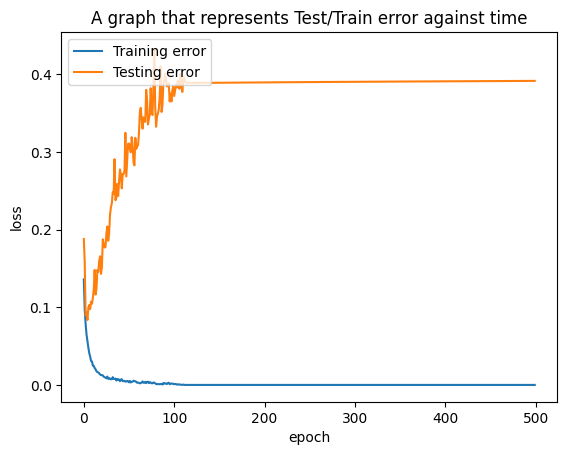

In [11]:
plt.figure()
plt.plot(history_a.history['loss'])
plt.plot(history_a.history['val_loss'])
plt.title('A graph that represents Test/Train error against time')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training error','Testing error'], loc = 'upper left')
plt.show()

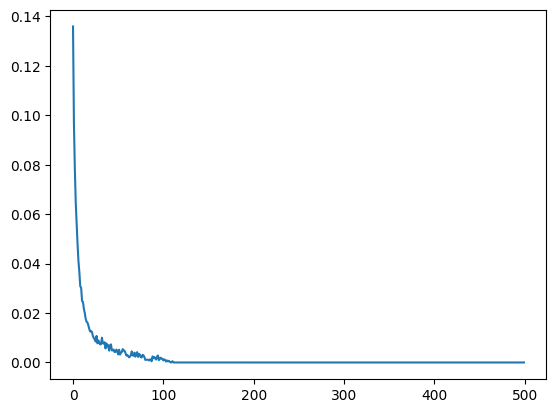

In [12]:
history_a_df = pd.DataFrame(history_a.history)
history_a_df['loss'].plot();

In [13]:
loss, acc= model_a.evaluate(X_test,y_test)
print("Accuracy on Test data:",acc)
print("Loss on Test Data:", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9736 - loss: 0.4792
Accuracy on Test data: 0.9782999753952026
Loss on Test Data: 0.39144736528396606


In [14]:
#model b
model_b= keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model_b.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

In [16]:
history_b=model_b.fit(X_train,y_train,
                    batch_size=64,
                    validation_data=(X_test,y_test),
                    epochs=500
                    )

Epoch 1/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8753 - loss: 0.4047 - val_accuracy: 0.9680 - val_loss: 0.1024
Epoch 2/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9715 - loss: 0.0934 - val_accuracy: 0.9644 - val_loss: 0.1175
Epoch 3/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9814 - loss: 0.0627 - val_accuracy: 0.9775 - val_loss: 0.0791
Epoch 4/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0483 - val_accuracy: 0.9780 - val_loss: 0.0862
Epoch 5/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9887 - loss: 0.0372 - val_accuracy: 0.9757 - val_loss: 0.0987
Epoch 6/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9915 - loss: 0.0299 - val_accuracy: 0.9805 - val_loss: 0.0915
Epoch 7/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9935 - loss: 0.0220 - val_accuracy: 0.9808 - val_loss: 0.1017
Epoch 8/500
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9940 - loss: 0.0206 - val_accu

In [17]:
loss, acc= model_b.evaluate(X_test,y_test)
print("Accuracy on Test data:",acc)
print("Loss on Test Data:", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9827 - loss: 0.2168
Accuracy on Test data: 0.9854999780654907
Loss on Test Data: 0.18546292185783386


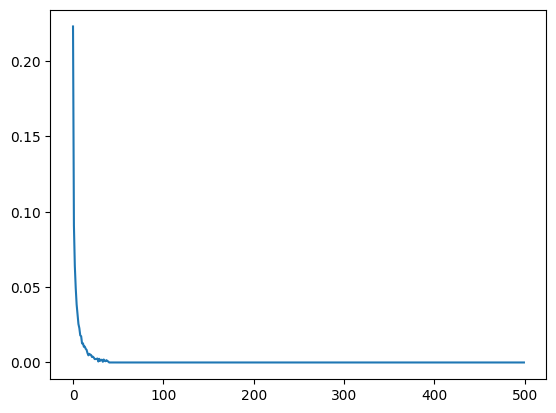

In [18]:
history_b_df = pd.DataFrame(history_b.history)
history_b_df['loss'].plot();

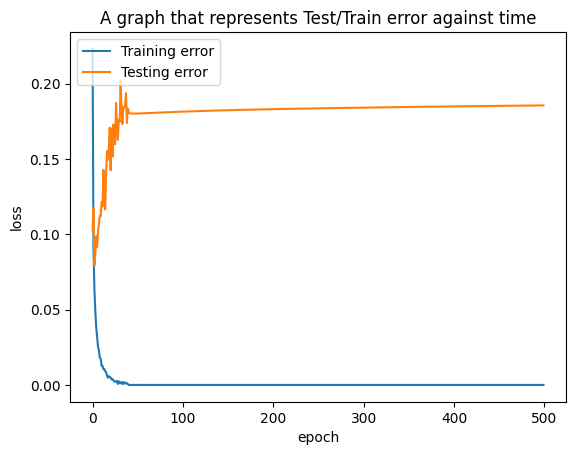

In [19]:
plt.figure()
plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])
plt.title('A graph that represents Test/Train error against time')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training error','Testing error'], loc = 'upper left')
plt.show()